Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

Tips for using SVM for image classification

* You should have image data in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D which i'll be showing later on in this notebook).

* SVM algorithm is to be used when their is shortage of data in our dataset .

* If we have good amount of image data so, we look further for CNN model.


# INFO OF DATASET...!!

The Dataset is named as 'Color Classification' created by Aydin Ayanzadeh. we are provided with images of different color set with labels of color name such as red,blue,etc link :- https://www.kaggle.com/ayanzadeh93/color-classification

**Importing the dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing basic Packages..!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import kagglehub

now,we have provided data directory to DATADIR variable and labels of color set to CATEGORIES variable for further use.

In [3]:
DATA = kagglehub.dataset_download("ayanzadeh93/color-classification") + '../ColorClassification/'

CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

Ex. of an sample image is shown below


In [6]:
DATA = "/home/vscode/.cache/kagglehub/datasets/ayanzadeh93/color-classification/versions/1/ColorClassification"

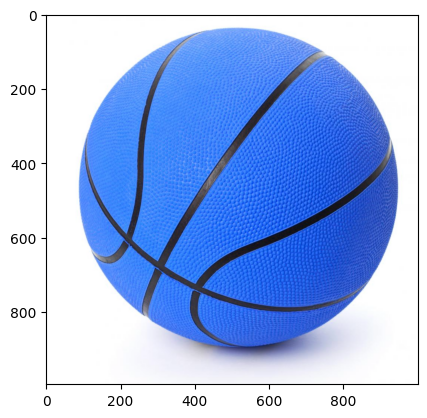

In [7]:
for category in CATEGORIES:
    path=os.path.join(DATA, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


performing preprocessing steps...::


In [8]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATA, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

107


storing trainig length for further use.

In [10]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [11]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [12]:
X.shape

(107, 30000)

**flattening the array**

In [13]:
X = X/255.0

Ex. of flattened array...

In [14]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

note : y should be in array form compulsory.


In [15]:
y=np.array(y)

In [16]:
y.shape

(107,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

# SVM Algorithm

In [18]:
from sklearn.svm import SVC

model = SVC(kernel='linear',gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

**predicting the X_test**

In [20]:
y2 = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7407407407407407


## Classification Report

In [22]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      0.60      0.55         5
           2       1.00      1.00      1.00         2
           3       0.40      0.50      0.44         4
           4       0.50      0.50      0.50         2
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.74        27
   macro avg       0.80      0.76      0.77        27
weighted avg       0.78      0.74      0.75        27



In [23]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [24]:
result


,original,predicted
0,6,6
1,5,5
2,7,7
3,1,3
4,7,7
5,1,1
6,3,1
7,1,1
8,5,1
9,3,1


# CNN Algorithm

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
%pip install --upgrade tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = len(CATEGORIES)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1732145443.549328    6048 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
W0000 00:00:1732145444.751587    6673 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /workspaces/eng-ai-agents/.venv/lib/python3.11/site-package

## Compile model

In [30]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=1
history = model.fit(
  X_train,
  validation_data=X_test,
  epochs=epochs
)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 30000), dtype=float32). Expected shape (None, 100, 100, 3), but input has incompatible shape (None, 30000)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30000), dtype=float32)
  • training=True
  • mask=None

In [35]:
print(X_train.shape)
print(X_test.shape)

(80, 30000)
(27, 30000)
